# 0.0 Imports

In [10]:
import pandas as pd
import numpy  as np

import inflection
import datetime

import seaborn as sns
#import xgboost as xgb
import sweetviz as sv

from matplotlib import pyplot as plt
from matplotlib.gridspec import GridSpec
from IPython.core.display import HTML

from sklearn import model_selection as ms
from sklearn import preprocessing   as pp
from sklearn import ensemble        as en

## 0.1 Helper functions

In [11]:
def rename_columns(dataframe):
    df = dataframe.copy()
    title = lambda x: inflection.titleize(x)
    snakecase = lambda x: inflection.underscore(x)
    spaces = lambda x: x.replace(" ", "")
    cols_old = list(df.columns)
    cols_old = list(map(title, cols_old))
    cols_old = list(map(spaces, cols_old))
    cols_new = list(map(snakecase, cols_old))
    df.columns = cols_new
    return df

def jupyter_settings():
    %matplotlib inline
    #%pylab inline
    
    plt.style.use( 'bmh' )
    plt.rcParams['figure.figsize'] = [12, 8]
    plt.rcParams['font.size'] = 24
    
    display( HTML( '<style>.container { width:100% !important; }</style>') )
    #pd.set_option('max_columns', None, "max_rows", 50)
    pd.options.display.max_rows = 999
    pd.set_option( 'display.expand_frame_repr', False )
    
    sns.set()

In [12]:
jupyter_settings()

## 0.2 Loading data

In [13]:
df_raw_train = pd.read_csv('../data/train.csv')
df_raw_test = pd.read_csv('../data/test.csv')

# 1.0 Data description

In [14]:
df1 = df_raw_train.copy()

## 1.1 Rename columns

In [15]:
# Using the function we created in section 0.1
df1 = rename_columns(df1)

## 1.2 Data dimensions

In [16]:
print('Number of rows: {}'.format(df1.shape[0]))
print('Number of cols: {}'.format(df1.shape[1]))

Number of rows: 381109
Number of cols: 12


## 1.3 Data types

In [25]:
df1.sample(20)

,id,gender,age,driving_license,region_code,previously_insured,vehicle_age,vehicle_damage,annual_premium,policy_sales_channel,vintage,response
233563,233564,Female,42,1,26,0,1-2 Year,Yes,28040.0,152,84,0
244328,244329,Female,41,1,29,1,1-2 Year,No,2630.0,124,67,0
31280,31281,Male,47,1,28,1,1-2 Year,No,57006.0,55,281,0
148485,148486,Male,43,1,46,1,1-2 Year,No,28286.0,26,106,0
380838,380839,Female,41,1,7,0,1-2 Year,Yes,2630.0,124,61,0
28659,28660,Male,31,1,28,1,< 1 Year,Yes,34594.0,124,233,0
135779,135780,Female,32,1,8,1,< 1 Year,No,36350.0,152,216,0
101816,101817,Male,28,1,28,1,< 1 Year,No,38986.0,152,250,0
25538,25539,Male,64,1,28,0,> 2 Years,Yes,49085.0,124,277,0
358149,358150,Female,62,1,41,0,> 2 Years,Yes,48564.0,26,113,0


In [22]:
df1.dtypes

id                        int64
gender                   object
age                       int64
driving_license           int64
region_code               int64
previously_insured        int64
vehicle_age              object
vehicle_damage           object
annual_premium          float64
policy_sales_channel      int64
vintage                   int64
response                  int64
dtype: object

## 1.4 Check NA

In [23]:
df1.isna().sum()

id                      0
gender                  0
age                     0
driving_license         0
region_code             0
previously_insured      0
vehicle_age             0
vehicle_damage          0
annual_premium          0
policy_sales_channel    0
vintage                 0
response                0
dtype: int64

## 1.5 Fillout NA 

## 1.6 Change Types

In [26]:
df1['region_code'] = df1['region_code'].astype('int64')
df1['policy_sales_channel'] = df1['policy_sales_channel'].astype('int64')

## 1.7 Descriptive Statistical

In [27]:
num_attributes = df1[['id', 'age', 'annual_premium', 'vintage']]
cat_attributes = df1[['gender', 'driving_license', 'previously_insured', 'vehicle_age', 'vehicle_damage', 'policy_sales_channel', 'region_code', 'response']]

### 1.7.1 Numerical attributes

In [28]:
df_aux = num_attributes.describe().T[['min', 'max', 'mean', 'std']]
range_ = df_aux['min'] - df_aux['max']
kurt = num_attributes.kurt(axis=0)
skew = num_attributes.skew(axis=0)

df_aux['range'] = range_
df_aux['kurt'] = kurt
df_aux['skew'] = skew

df_aux

,min,max,mean,std,range,kurt,skew
id,1.0,381109.0,190555.000000,110016.836208,-381108.0,-1.200000,9.443274e-16
age,20.0,85.0,38.822584,15.511611,-65.0,-0.565655,6.725390e-01
annual_premium,2630.0,540165.0,30564.389581,17213.155057,-537535.0,34.004569,1.766087e+00
vintage,10.0,299.0,154.347397,83.671304,-289.0,-1.200688,3.029517e-03


### 1.7.2 Categorical attributes

In [29]:
cat_attributes

,gender,driving_license,previously_insured,vehicle_age,vehicle_damage,policy_sales_channel,region_code,response
0,Male,1,0,> 2 Years,Yes,26,28,1
1,Male,1,0,1-2 Year,No,26,3,0
2,Male,1,0,> 2 Years,Yes,26,28,1
3,Male,1,1,< 1 Year,No,152,11,0
4,Female,1,1,< 1 Year,No,152,41,0
...,...,...,...,...,...,...,...,...
381104,Male,1,1,1-2 Year,No,26,26,0
381105,Male,1,1,< 1 Year,No,152,37,0
381106,Male,1,1,< 1 Year,No,160,30,0
381107,Female,1,0,> 2 Years,Yes,124,14,0


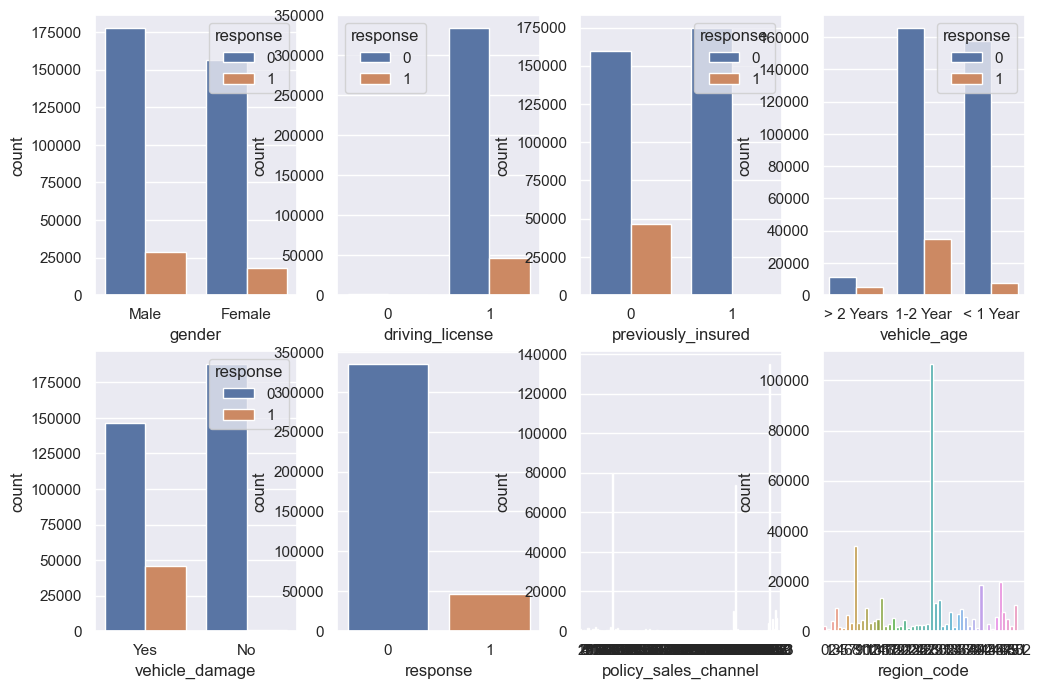

In [30]:
aux = df1.copy()

plt.subplot(2, 4, 1)
sns.countplot(x='gender', hue='response', data=aux);

plt.subplot(2, 4, 2)
sns.countplot(x='driving_license', hue='response', data=aux);

plt.subplot(2, 4, 3)
sns.countplot(x='previously_insured', hue='response', data=aux);

plt.subplot(2, 4, 4)
sns.countplot(x='vehicle_age', hue='response', data=aux);

plt.subplot(2, 4, 5)
sns.countplot(x='vehicle_damage', hue='response', data=aux);

plt.subplot(2, 4, 6)
sns.countplot(x='response', data=aux);

plt.subplot(2, 4, 7)
sns.countplot(x='policy_sales_channel', data=aux);

plt.subplot(2, 4, 8)
sns.countplot(x='region_code', data=aux);

# 2.0 Feature engineering

In [31]:
df2 = df1.copy()

## 2.1 Mapa mental de Hipoteses

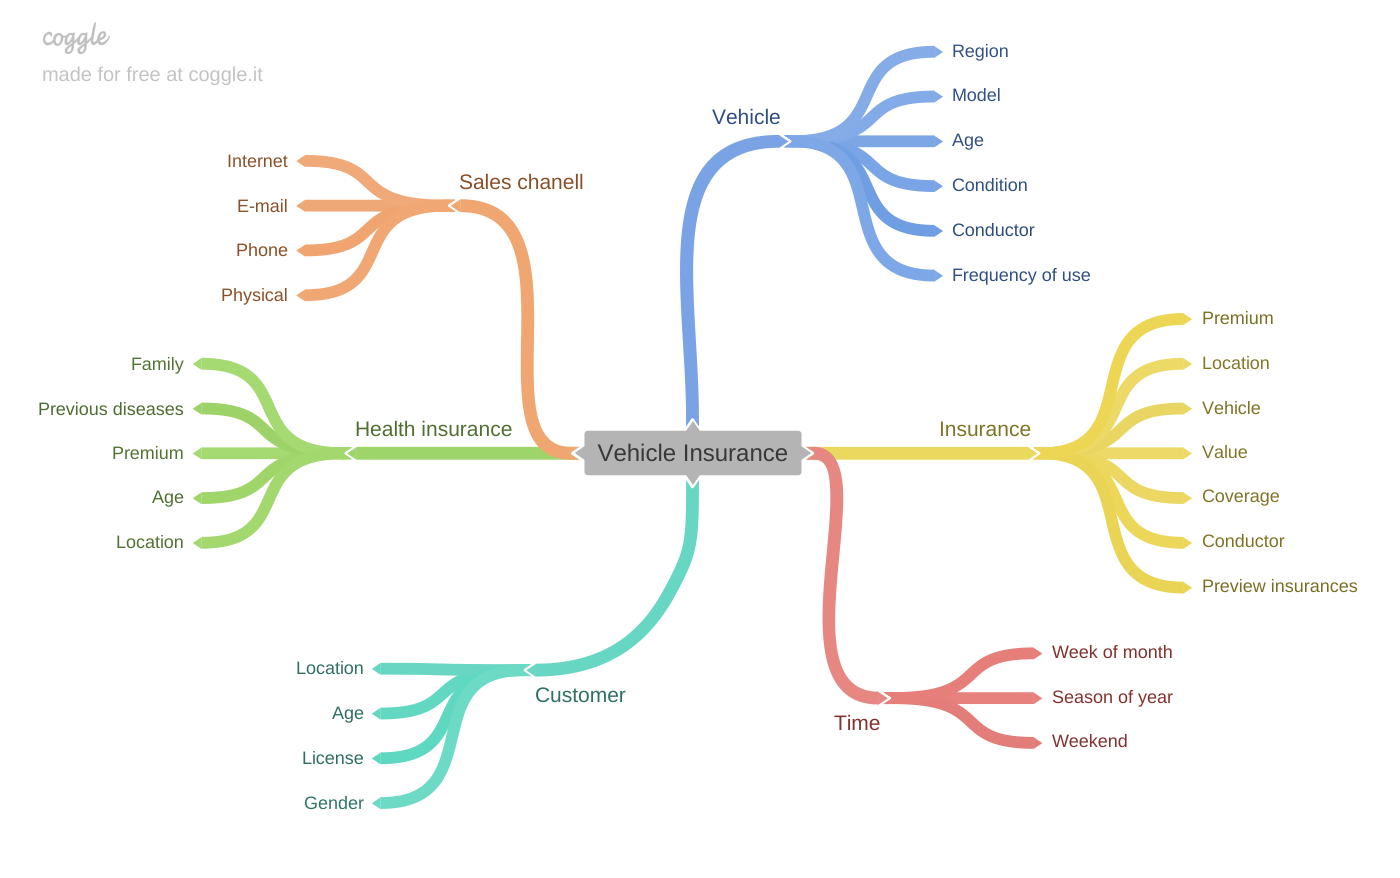

## 2.2 Criação de Hipoteses

- Vehicles
    - Vehicle with higher are have more probability to adquire insurance
    - Vehicles that got damaged have more probability to adquire insurance
    - Vehicles that already had an insurance have more probability to adquire insurance
    
    
- Health Insurance
    - Higher premium have more probability to adquire insurance
    - More days associeted have more probability to adquire insurance
    
- Customer
    - Higher age have more probability to adquire insurance
    - Female gender have more probability to adquire insurance
    - Dangerous location have more probability to adquire insurance
    
- Time - no data available
- Insurance - no data available
- Sales channel - no data available
    

## 2.3 Splitting dataset

In [17]:
X = df2.drop('response', axis=1).copy()
y = df2['response'].copy()

X_train, X_test, y_train, y_test = ms.train_test_split(X, y, stratify = y, test_size = 0.20, random_state = 42)

df2 = pd.concat([X_train, y_train], axis=1)

df_test = pd.concat([X_test, y_test], axis=1)

## 2.4 Feature engineering

In [18]:
df2.head()

,id,gender,age,driving_license,region_code,previously_insured,vehicle_age,vehicle_damage,annual_premium,policy_sales_channel,vintage,response
274710,274711,Male,22,1,40,0,< 1 Year,Yes,25455.0,152,203,0
216539,216540,Female,26,1,8,1,< 1 Year,No,38393.0,26,45,0
78983,78984,Female,32,1,28,0,< 1 Year,Yes,32118.0,122,35,1
218368,218369,Male,32,1,37,0,< 1 Year,Yes,37711.0,152,215,0
307215,307216,Female,24,1,28,0,< 1 Year,Yes,48706.0,156,222,0


In [19]:
df2['vehicle_damage'].unique()

array(['Yes', 'No'], dtype=object)

In [20]:
damage = {'Yes': 1, 'No':0}

df2['vehicle_damage'] = df2['vehicle_damage'].map(damage)

# 3.0 Feature filtering

In [21]:
df3 = df2.copy()

## 3.1 Filtragem das linhas

## 3.2 Seleção das colunas

# 4.0 EDA - Análise exploratória dos dados

In [22]:
df4 = df3.copy()

In [23]:
df4.head()

,id,gender,age,driving_license,region_code,previously_insured,vehicle_age,vehicle_damage,annual_premium,policy_sales_channel,vintage,response
274710,274711,Male,22,1,40,0,< 1 Year,1,25455.0,152,203,0
216539,216540,Female,26,1,8,1,< 1 Year,0,38393.0,26,45,0
78983,78984,Female,32,1,28,0,< 1 Year,1,32118.0,122,35,1
218368,218369,Male,32,1,37,0,< 1 Year,1,37711.0,152,215,0
307215,307216,Female,24,1,28,0,< 1 Year,1,48706.0,156,222,0


## 4.1 Análise univariada

### 4.1.1 Response variable

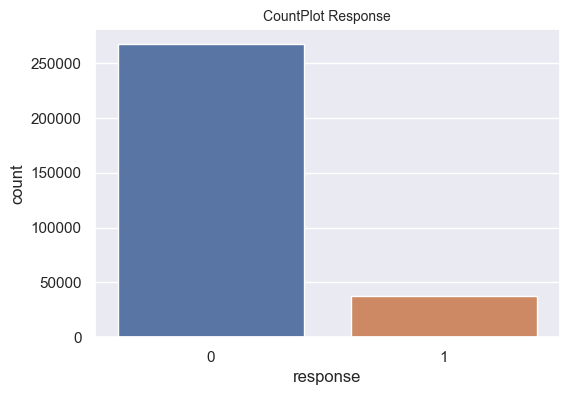

In [42]:
fig, ax = plt.subplots(figsize=(6,4))
sns.countplot(data=df2, x='response', ax=ax)
ax.set_title("CountPlot Response", fontsize=10);

In [25]:
response_count = {
    'count':[len(df4[df4['response']==0]), len(df4[df4['response']==1])],
}
df_response = pd.DataFrame.from_dict(response_count)
df_response['percent'] = df_response['count'] / len(df4)
df_response

,count,percent
0,267519,0.877437
1,37368,0.122563


### 4.1.2 Numerical variable

C:\Users\Gabriel\AppData\Local\Temp\ipykernel_12592\2533347166.py:3: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared.
  df4.hist(ax=ax, bins= 10);


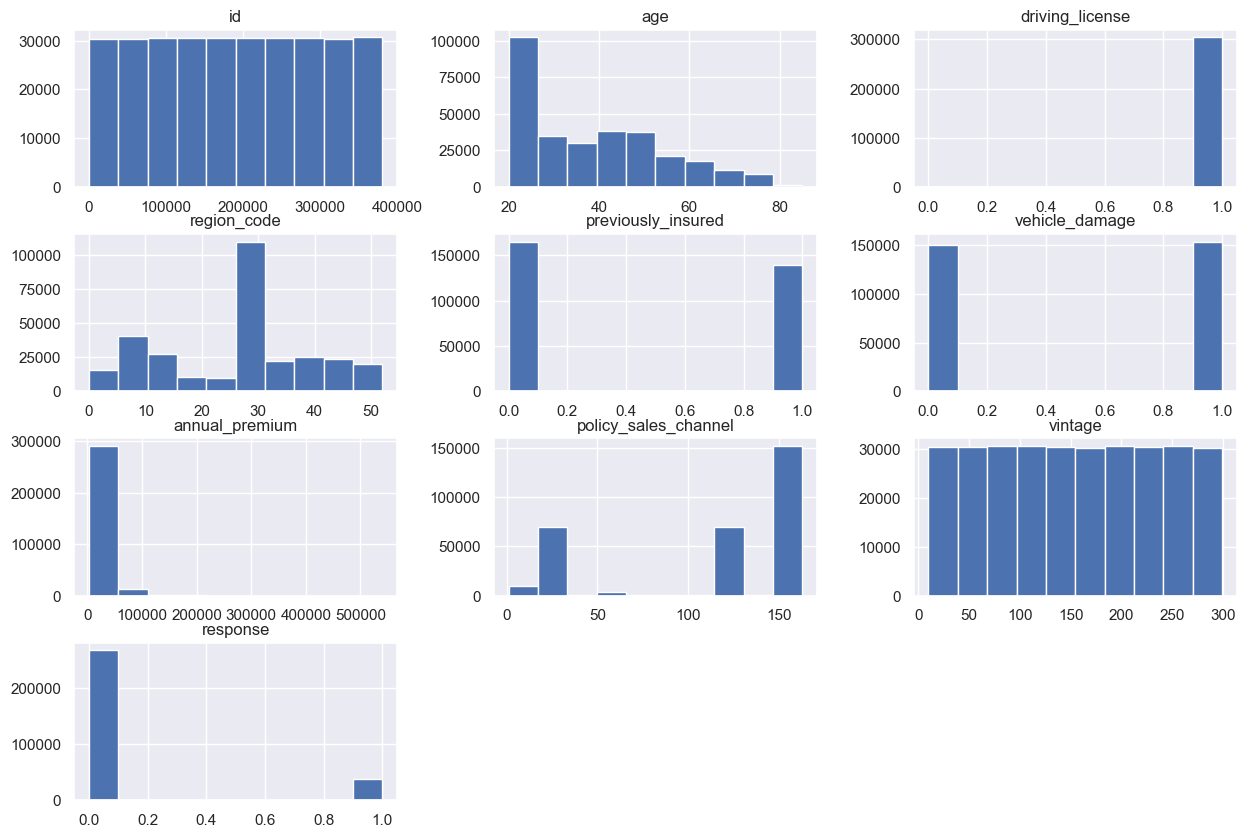

In [26]:
fig = plt.figure(figsize = (15,10))
ax = fig.gca()
df4.hist(ax=ax, bins= 10);

### 4.1.3 Categorical variable

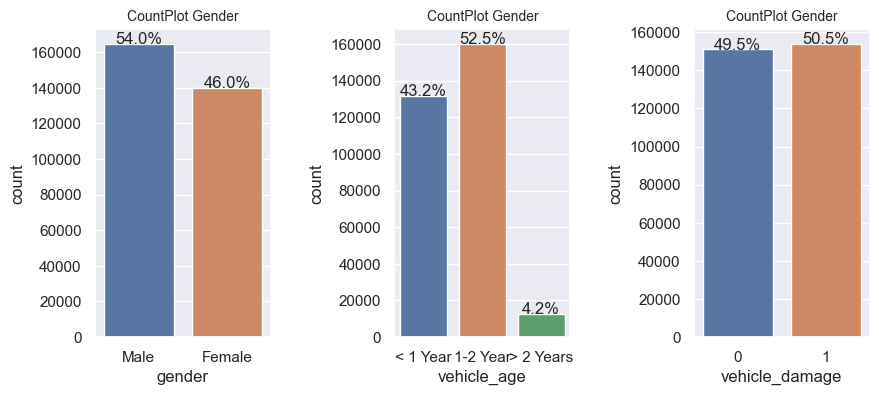

In [121]:
# gender
fig, ax = plt.subplots(1,3, figsize=(10,4))

sns.countplot(data=df4, x='gender', ax=ax[0])
ax[0].set_title("CountPlot Gender", fontsize=10);
for p in ax[0].patches:
            height = p.get_height()
            ax[0].text(p.get_x() + p.get_width()/2., height + 3, '{:.1f}%'.format(height/len(df4)*100), ha="center")
            
# vehicle_age
sns.countplot(data=df4, x='vehicle_age', ax=ax[1])
ax[1].set_title("CountPlot Gender", fontsize=10);
for p in ax[1].patches:
            height = p.get_height()
            ax[1].text(p.get_x() + p.get_width()/2., height + 3, '{:.1f}%'.format(height/len(df4)*100), ha="center")

# vehicle_damage
sns.countplot(data=df4, x='vehicle_damage', ax=ax[2])
ax[2].set_title("CountPlot Gender", fontsize=10);
for p in ax[2].patches:
            height = p.get_height()
            ax[2].text(p.get_x() + p.get_width()/2., height + 3, '{:.1f}%'.format(height/len(df4)*100), ha="center")
            
plt.subplots_adjust(wspace=0.7)

## 4.2 Análise bivariada

* Vehicles 
    - Vehicle with higher age have more probability to adquire insurance

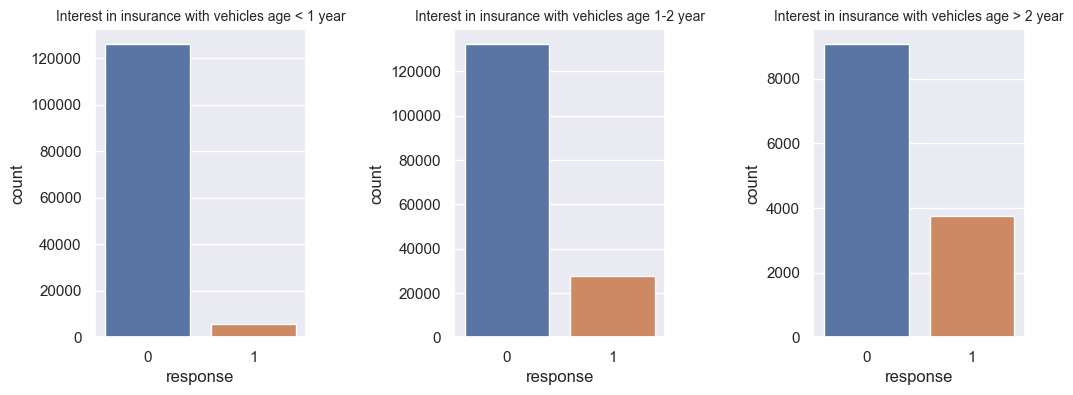

In [138]:
#Vehicles
fig, ax = plt.subplots(1,3,figsize=(12,4))

aux = df4[df4['vehicle_age']=='< 1 Year']
sns.countplot(data=aux, x='response', ax=ax[0])
ax[0].set_title("Interest in insurance with vehicles age < 1 year", fontsize=10);

aux = df4[df4['vehicle_age']=='1-2 Year']
sns.countplot(data=aux, x='response', ax=ax[1])
ax[1].set_title("Interest in insurance with vehicles age 1-2 year", fontsize=10);

aux = df4[df4['vehicle_age']=='> 2 Years']
sns.countplot(data=aux, x='response', ax=ax[2])
ax[2].set_title("Interest in insurance with vehicles age > 2 year", fontsize=10);

plt.subplots_adjust(wspace=0.7)

Hypothesis is true, clients with older vehicles has more intereset in adquiring insurance

- Vehicles that got damaged have more probability to adquire insurance

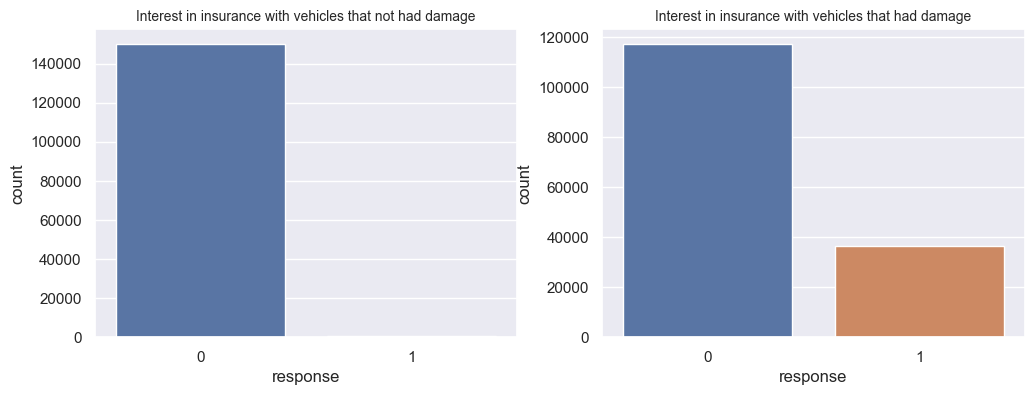

In [144]:
fig, ax = plt.subplots(1,2,figsize=(12,4))

aux = df4[df4['vehicle_damage']==0]
sns.countplot(data=aux, x='response', ax=ax[0])
ax[0].set_title("Interest in insurance with vehicles that not had damage", fontsize=10);

aux = df4[df4['vehicle_damage']==1]
sns.countplot(data=aux, x='response', ax=ax[1])
ax[1].set_title("Interest in insurance with vehicles that had damage", fontsize=10);

Hypothesis is true, clients with vehicles that had damage have more interest in adquire insurance

- Vehicles that already had an insurance have more probability to adquire insurance

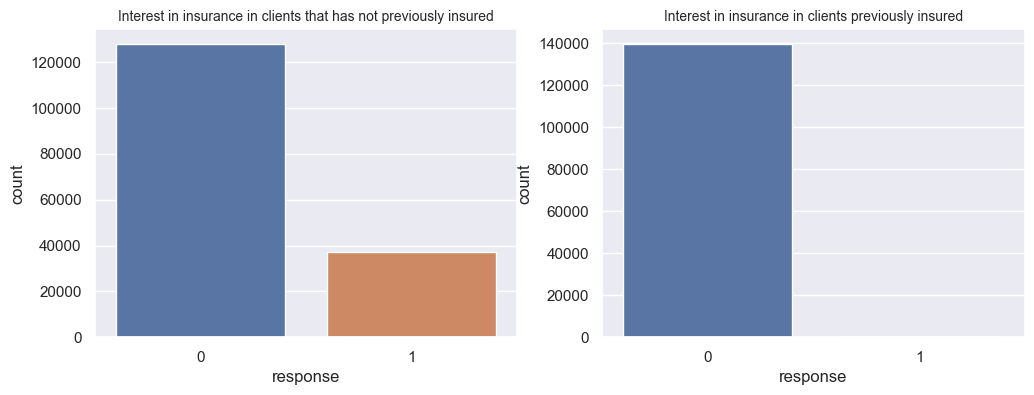

In [146]:
fig, ax = plt.subplots(1,2,figsize=(12,4))

aux = df4[df4['previously_insured']==0]
sns.countplot(data=aux, x='response', ax=ax[0])
ax[0].set_title("Interest in insurance in clients that has not previously insured", fontsize=10);

aux = df4[df4['previously_insured']==1]
sns.countplot(data=aux, x='response', ax=ax[1])
ax[1].set_title("Interest in insurance in clients previously insured", fontsize=10);

Hypothesis is false, clients previously insured have less intereset in adquiring insurance

- Health Insurance
    - Higher premium have more probability to adquire insurance

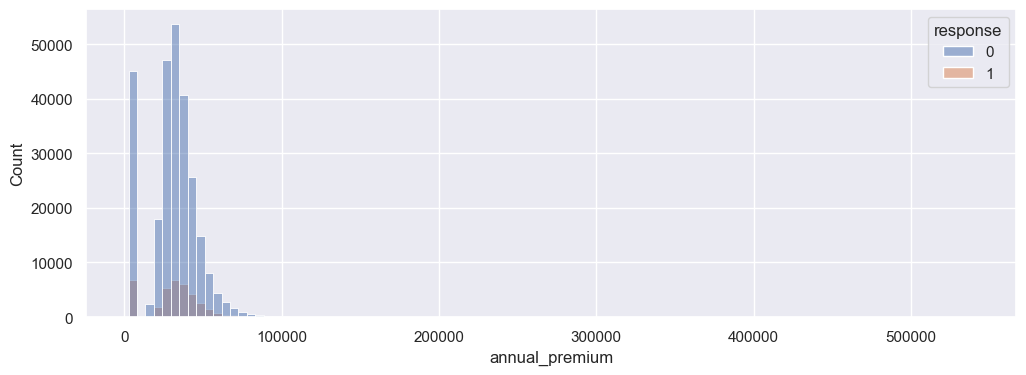

In [156]:
fig, ax = plt.subplots(figsize=(12,4))
sns.histplot(x='annual_premium', hue='response', data=df4, bins=100, ax=ax);

Hypothesis is false, clients with higher annual premium have less interest in insurance

- More days associeted have more probability to adquire insurance


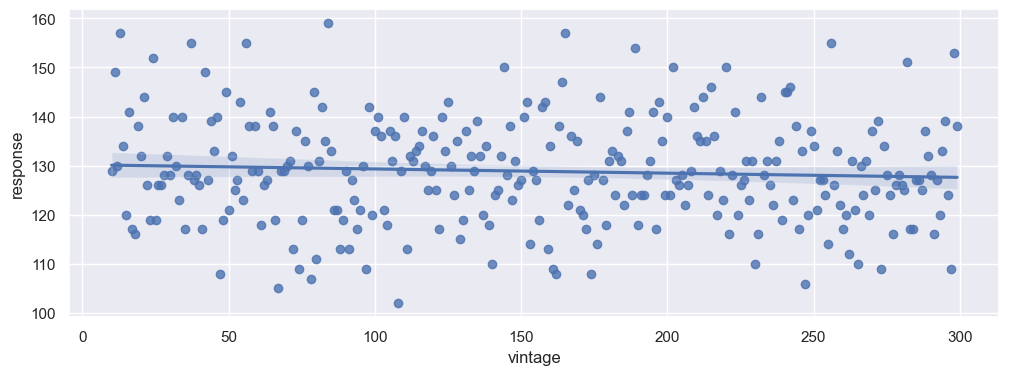

In [161]:
fig, ax = plt.subplots(figsize=(12,4))
aux = df4[['vintage', 'response']].groupby('vintage').sum().reset_index()
sns.regplot(x='vintage', y='response', data=aux, ax=ax);

Hypotehsis is false, clients with more days associeted have less intereset in insurance

- Customer
    - Higher age have more probability to adquire insurance

<Axes: xlabel='response', ylabel='age'>

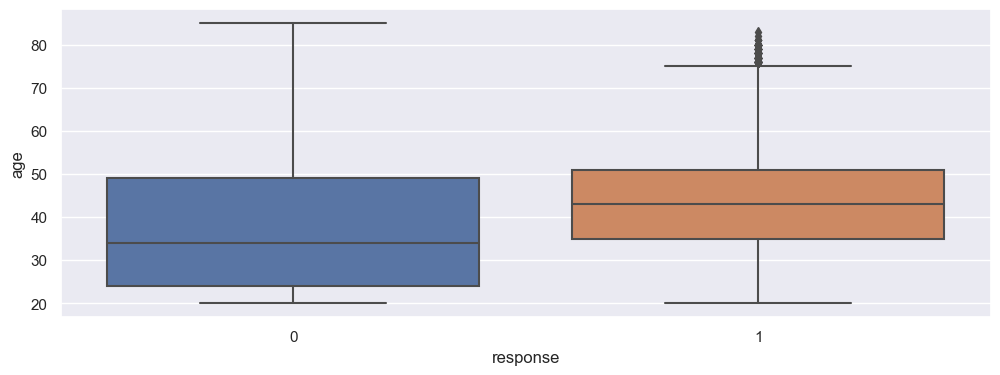

In [164]:
fig, ax = plt.subplots(figsize=(12,4))
sns.boxplot(x='response', y='age', data=df4, ax=ax)

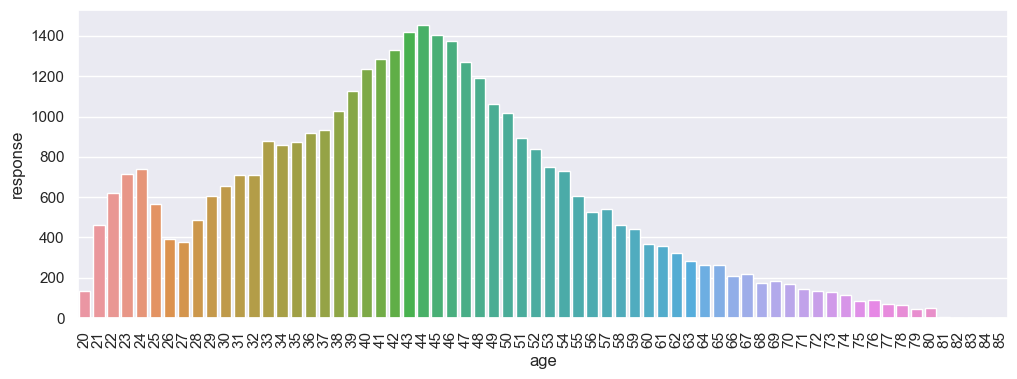

In [167]:
fig, ax = plt.subplots(figsize=(12,4))
aux = df4[['age', 'response']].groupby('age').sum().reset_index()
sns.barplot(x='age', y='response', data=aux, ax=ax)
plt.xticks( rotation=90 );

Hypothesis is false, customers with higher age have less interest in insurance

- Female gender have more probability to adquire insurance

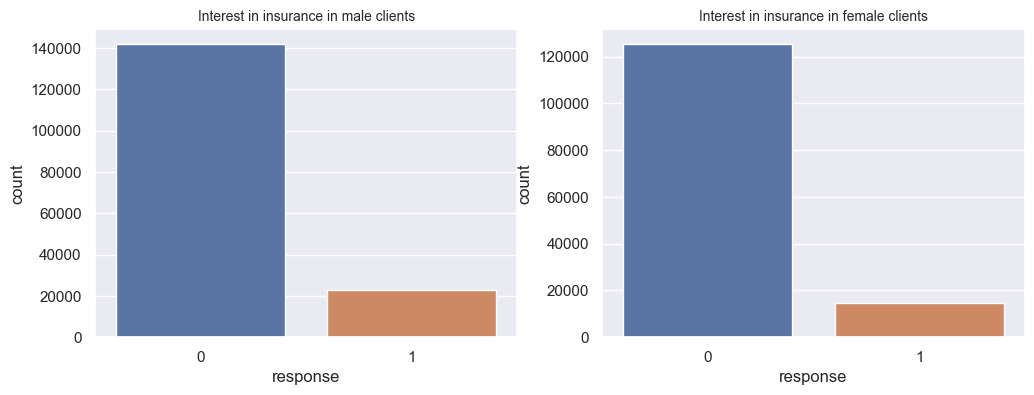

In [170]:
fig, ax = plt.subplots(1,2,figsize=(12,4))

aux = df4[df4['gender']=='Male']
sns.countplot(data=aux, x='response', ax=ax[0])
ax[0].set_title("Interest in insurance in male clients", fontsize=10);

aux = df4[df4['gender']=='Female']
sns.countplot(data=aux, x='response', ax=ax[1])
ax[1].set_title("Interest in insurance in female clients", fontsize=10);

In [160]:
df4

,id,gender,age,driving_license,region_code,previously_insured,vehicle_age,vehicle_damage,annual_premium,policy_sales_channel,vintage,response
274710,274711,Male,22,1,40,0,< 1 Year,1,25455.0,152,203,0
216539,216540,Female,26,1,8,1,< 1 Year,0,38393.0,26,45,0
78983,78984,Female,32,1,28,0,< 1 Year,1,32118.0,122,35,1
218368,218369,Male,32,1,37,0,< 1 Year,1,37711.0,152,215,0
307215,307216,Female,24,1,28,0,< 1 Year,1,48706.0,156,222,0
...,...,...,...,...,...,...,...,...,...,...,...,...
378816,378817,Male,25,1,47,1,< 1 Year,1,23010.0,160,58,0
67726,67727,Male,69,1,28,0,1-2 Year,1,31630.0,26,290,1
91744,91745,Male,24,1,28,0,< 1 Year,0,59094.0,152,62,0
48700,48701,Female,40,1,8,1,1-2 Year,0,28940.0,26,262,0


### 4.2.x Hipothesis validation

### 4.2.y Hipothesis resume

## 4.3 Análise multivariada

### 4.3.1 Numerical attributes

### 4.3.2 Categorical attributes

# 5.0 Data Preparation

In [66]:
df5 = df4.copy()

## 5.1 Normalization

In [67]:
# annual_premiu -> StandardScaler
ss = pp.StandardScaler()
df5['annual_premium'] = ss.fit_transform(df5[['annual_premium']].values)

In [73]:
df5.head()

,id,gender,age,driving_license,region_code,previously_insured,vehicle_damage,annual_premium,policy_sales_channel,vintage,response,vehicle_age_above_2_year,vehicle_age_below_1_year,vehicle_age_between_1_2_year
274710,274711,0.138069,0.030769,1,0.117421,0,1,-0.297943,0.354223,0.667820,0,0,1,0
216539,216540,0.104327,0.092308,1,0.095217,1,0,0.452554,0.208959,0.121107,0,0,1,0
78983,78984,0.104327,0.184615,1,0.187042,0,1,0.088559,0.026079,0.086505,1,0,1,0
218368,218369,0.138069,0.184615,1,0.077466,0,1,0.412993,0.354223,0.709343,0,0,1,0
307215,307216,0.104327,0.061538,1,0.187042,0,1,1.050781,0.027787,0.733564,0,0,1,0


## 5.2 Rescaling

In [69]:
mms_age = pp.MinMaxScaler()
mms_vintage = pp.MinMaxScaler()

# age
df5['age'] = mms_age.fit_transform(df5[['age']].values)

# vintage
df5['vintage'] = mms_vintage.fit_transform(df5[['vintage']].values)

## 5.3 Encoding

In [70]:
# gender
gender_target = df5[['gender', 'response']].groupby('gender')['response'].mean()
df5['gender'] = df5['gender'].map(gender_target)

# region code
region_encoder = df5[['region_code', 'response']].groupby('region_code')['response'].mean()
df5['region_code'] = df5['region_code'].map(region_encoder)

# vehicle_age
age_dict = {'< 1 Year':'below_1_year', '1-2 Year':'between_1_2_year', '> 2 Years':'above_2_year'}
df5['vehicle_age'] = df5['vehicle_age'].map(age_dict)

df5 = pd.get_dummies(df5, prefix='vehicle_age', columns=['vehicle_age'])

# policy_sales_chanel
policy_encoder = df5.groupby('policy_sales_channel').size() / len(df5)
df5['policy_sales_channel'] = df5['policy_sales_channel'].map(policy_encoder)

## 5.4 Test preparation

In [78]:
df_test

,id,gender,age,driving_license,region_code,previously_insured,vehicle_damage,annual_premium,policy_sales_channel,vintage,response,vehicle_age_above_2_year,vehicle_age_below_1_year,vehicle_age_between_1_2_year
16221,16222,0.138069,0.523077,1,0.187042,0,1,2.616482,0.208959,0.148789,1,1,0,0
342480,342481,0.104327,0.092308,1,0.127951,0,1,-0.626539,0.027787,0.934256,0,0,0,1
20915,20916,0.138069,0.076923,1,0.187042,0,1,1.815971,0.194128,0.847751,0,0,1,0
38703,38704,0.138069,0.138462,1,0.138790,0,1,-1.626550,0.017666,0.778547,1,0,0,1
363808,363809,0.104327,0.123077,1,0.187042,0,1,1.228461,0.208959,0.806228,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
151614,151615,0.138069,0.307692,1,0.187042,0,1,0.133874,0.194128,0.449827,0,0,0,1
170170,170171,0.104327,0.292308,1,0.103310,0,0,-1.626550,0.194128,0.581315,0,0,0,1
303221,303222,0.138069,0.615385,1,0.187042,0,1,0.380428,0.208959,0.951557,0,0,0,1
333829,333830,0.138069,0.046154,1,0.073650,1,0,-0.127820,0.354223,0.304498,0,0,1,0


In [77]:
df_test['vehicle_damage'] = df_test['vehicle_damage'].map(damage)

# annual_premiu -> StandardScaler
df_test['annual_premium'] = ss.fit_transform(df_test[['annual_premium']].values)

# age
df_test['age'] = mms_age.fit_transform(df_test[['age']].values)

# vintage
df_test['vintage'] = mms_vintage.fit_transform(df_test[['vintage']].values)

# gender
df_test['gender'] = df_test['gender'].map(gender_target)

# region code
df_test['region_code'] = df_test['region_code'].map(region_encoder)

# vehicle_age
df_test['vehicle_age'] = df_test['vehicle_age'].map(age_dict)

df_test = pd.get_dummies(df_test, prefix='vehicle_age', columns=['vehicle_age'])

# policy_sales_chanel
df_test['policy_sales_channel'] = df_test['policy_sales_channel'].map(policy_encoder)

In [84]:
df_test.isna().sum()

id                              0
gender                          0
age                             0
driving_license                 0
region_code                     0
previously_insured              0
vehicle_damage                  0
annual_premium                  0
policy_sales_channel            0
vintage                         0
response                        0
vehicle_age_above_2_year        0
vehicle_age_below_1_year        0
vehicle_age_between_1_2_year    0
dtype: int64

In [82]:
df_test.loc[df_test['policy_sales_channel'].isna()]

,id,gender,age,driving_license,region_code,previously_insured,vehicle_damage,annual_premium,policy_sales_channel,vintage,response,vehicle_age_above_2_year,vehicle_age_below_1_year,vehicle_age_between_1_2_year
279714,279715,0.138069,0.723077,1,0.187042,1,0,0.162457,NaN,0.968858,0,0,0,1


In [83]:
df_test = df_test.drop(index = [279714])

In [85]:
y_test = df_test['response']
X_test = df_test.drop('response', axis=1)

# 6.0 Feature selection

In [86]:
df6 = df5.copy()

## 6.1 Splitting dataframe for validation

In [87]:
X = df6.drop(['response', 'id'], axis = 1).copy() # 304887 rows × 12 columns
y = df6['response'].copy() #Length: 304887

#Split Train into Val:
X_train, X_val, y_train, y_val = ms.train_test_split(X, y, stratify = y, test_size=0.10, random_state = 45)

## 6.2 Extra Trees as Feature Selector

In [90]:
extra_trees = en.ExtraTreesClassifier( n_estimators=250, random_state=0, n_jobs=-1 )

In [91]:
# data preparation
x_train_n = X_train 
y_train_n = y_train.values
extra_trees.fit( x_train_n, y_train_n )

ExtraTreesClassifier(n_estimators=250, n_jobs=-1, random_state=0)

Feature Ranking:
                        feature  importance
0                       vintage    0.271046
0                annual_premium    0.242200
0                           age    0.169291
0                   region_code    0.104967
0                vehicle_damage    0.067514
0          policy_sales_channel    0.061199
0            previously_insured    0.056447
0      vehicle_age_below_1_year    0.013654
0  vehicle_age_between_1_2_year    0.005955
0                        gender    0.004747
0      vehicle_age_above_2_year    0.002441
0               driving_license    0.000539


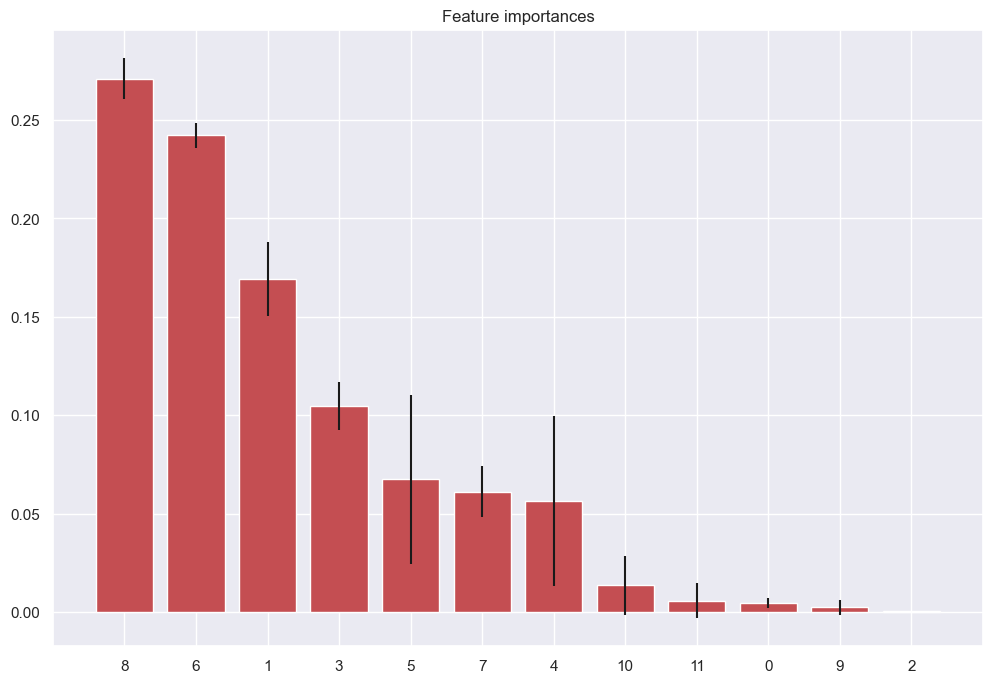

In [92]:
importances = extra_trees.feature_importances_
std = np.std( [tree.feature_importances_ for tree in extra_trees.estimators_], axis=0 )
indices = np.argsort(importances)[::-1] #trees importance ordered by greater value

# Print feature ranking
print('Feature Ranking:')
df_imp = pd.DataFrame()
for i, j in zip( x_train_n, extra_trees.feature_importances_ ):
    aux = pd.DataFrame( {'feature':i , 'importance': j}, index=[0] )
    df_imp = pd.concat( [df_imp, aux], axis=0 )
    
print(df_imp.sort_values('importance', ascending=False) )

# Plot the imputity-based feature importances of the forest
plt.figure()
plt.title('Feature importances')
plt.bar( range(x_train_n.shape[1]), importances[indices], color='r', yerr=std[indices], align='center' )
plt.xticks( range(x_train_n.shape[1]), indices )
plt.xlim( [-1, x_train_n.shape[1]] )
plt.show()

## 6.3 Manual feature selection

# 7.0 Machine Learning Modelling

## 7.1 Baseline model

## 7.2 Linear regression model

### 7.2.1 Linear regression model - Cross validation

## 7.3 Random Forest 

### 7.4.1 Random Forest  - Cross validation

## 7.5 XGBoost Regrssor

### 7.5.1 XGBoost Regressor - Cross Validation

## 7.6 Compare Model's Performance


### 7.6.1 Single performance

### 7.6.2 Real performance - Cross validation

# 8.0 Hyperparameter Fine Tuning

## 8.1 Random search

## 8.2 - Final model